# Magnetic Dipole Calculations
## Global Optimisation




In [1]:
# %matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format ='retina'
%run magsa_lib.py

Initialise Parameters

In [2]:
r = 2.25e-9 # nm radius
d = 0.35e-9 # nm stacking distance
step = 10 # chirality -  degrees rotation


Bext = np.array([0,0,2]) # Applied Field
m_atom = 8.9 # atomic moment in µB
Bmag = np.linalg.norm(Bext)
T = 298 # K
m_curie = curie_moment(m_atom,Bmag,T)
NN = 1# number of monomers
param = {
    'r':r,
    'd':d,
    'step':10,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':90.0,
    'NN':NN,
    'min':0,
}

param

{'r': 2.25e-09,
 'd': 3.5e-10,
 'step': 10,
 'm_atom': 8.9,
 'Bext': array([0, 0, 2]),
 'T': 298,
 'm_curie': 0.11903009247365273,
 'az': 90.0,
 'el': 90.0,
 'NN': 1,
 'min': 0}

## Bx

Calculate the groundstate for an assembly, and plot the magnetic moments and local dipolar fields at each atomic site.

<IPython.core.display.Javascript object>


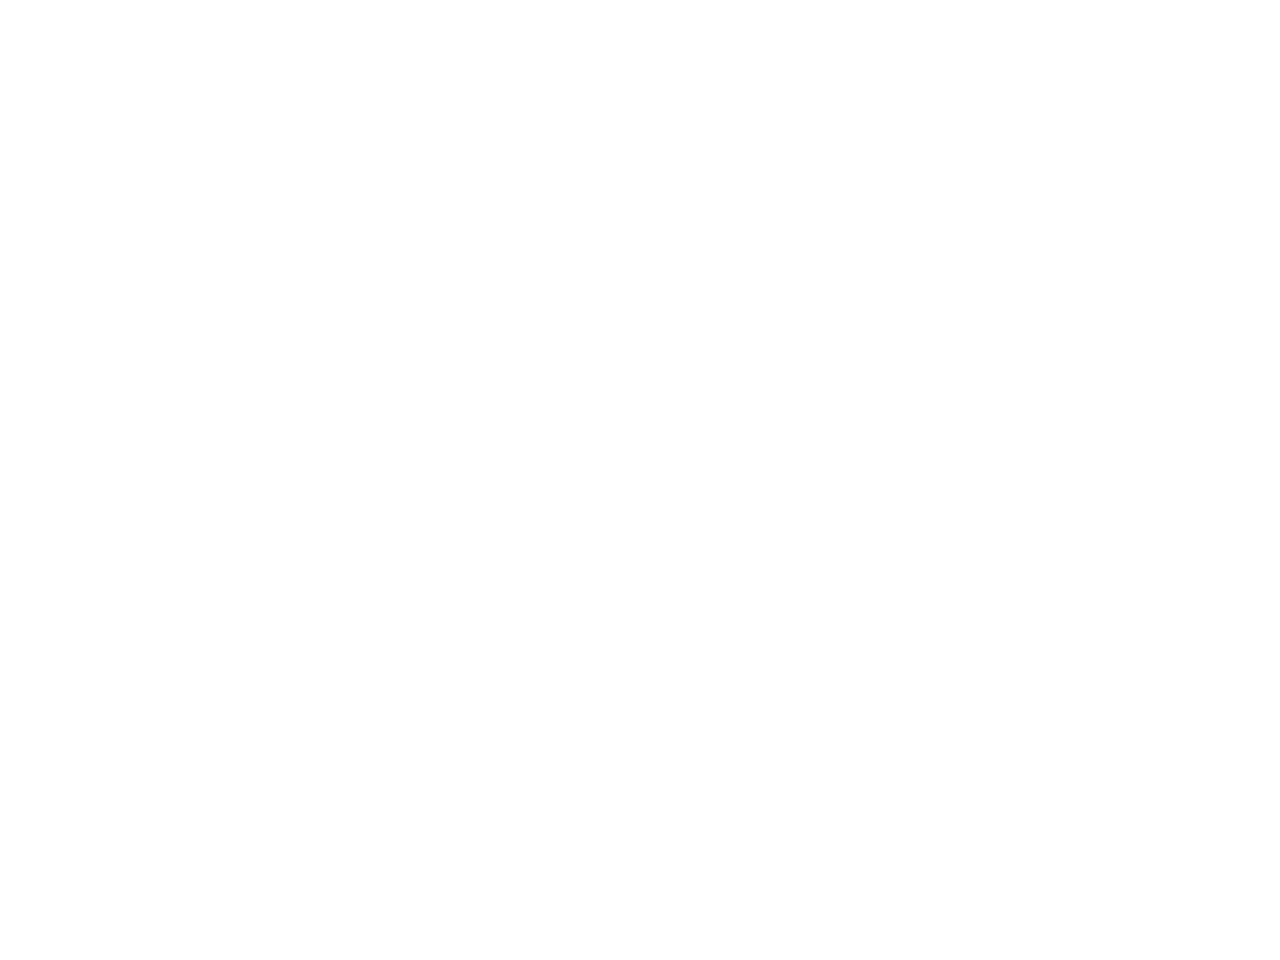

<IPython.core.display.Javascript object>


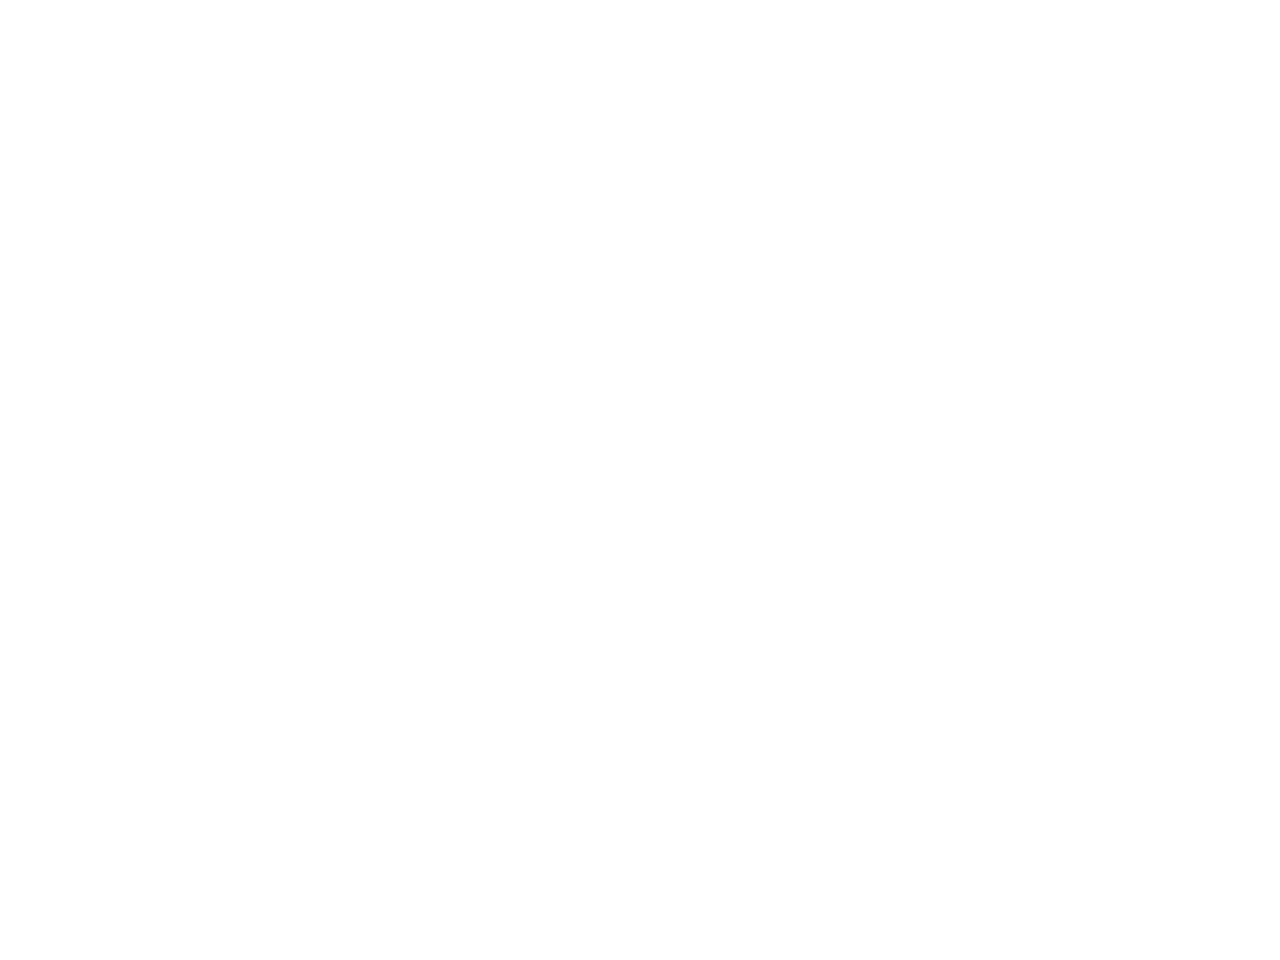

-79.76 J/mol/assem -3.99 J/mol/mono 20 monomers 7.00 nm


<IPython.core.display.Javascript object>


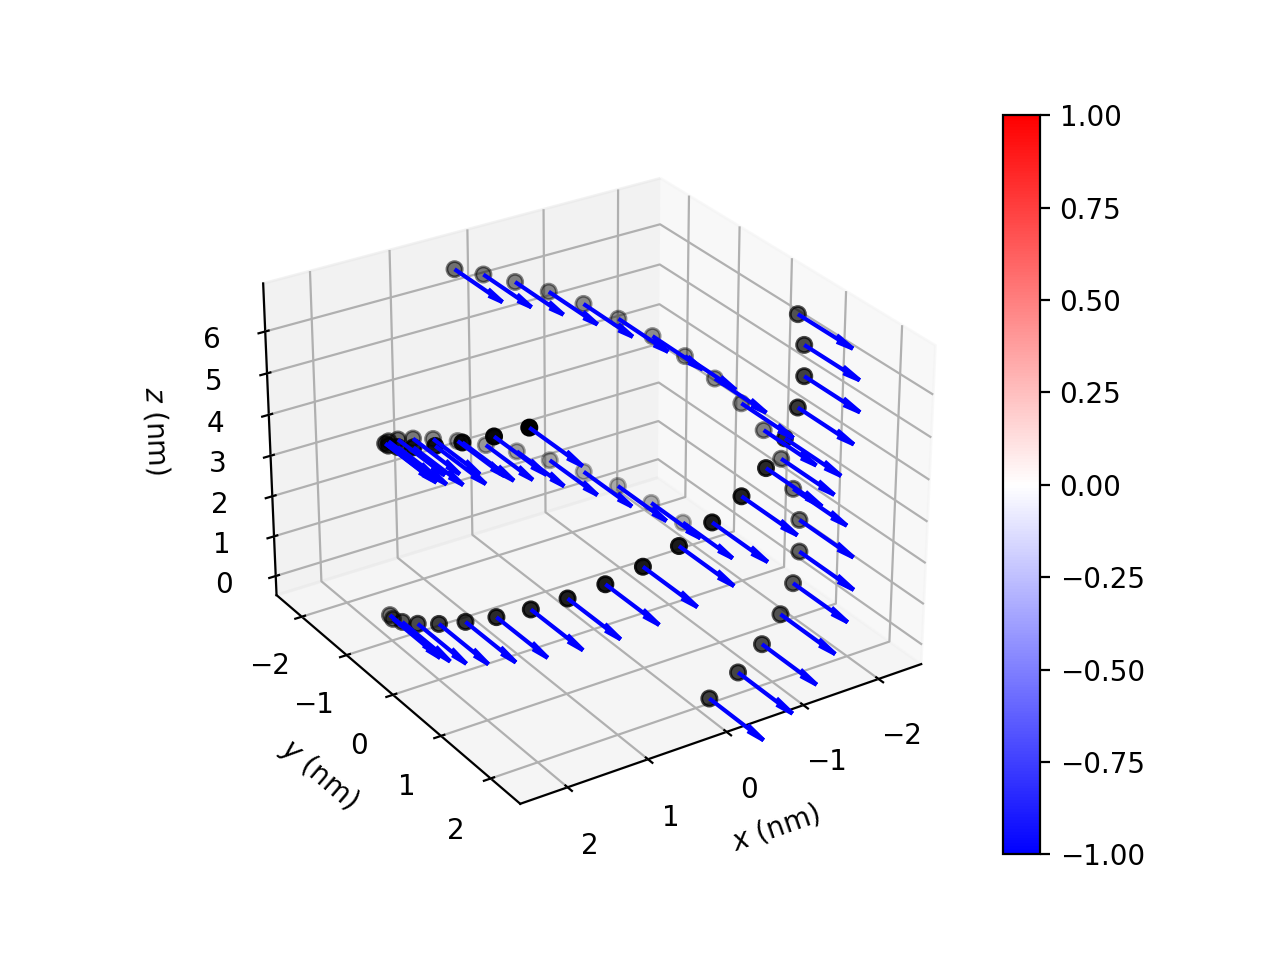

<IPython.core.display.Javascript object>


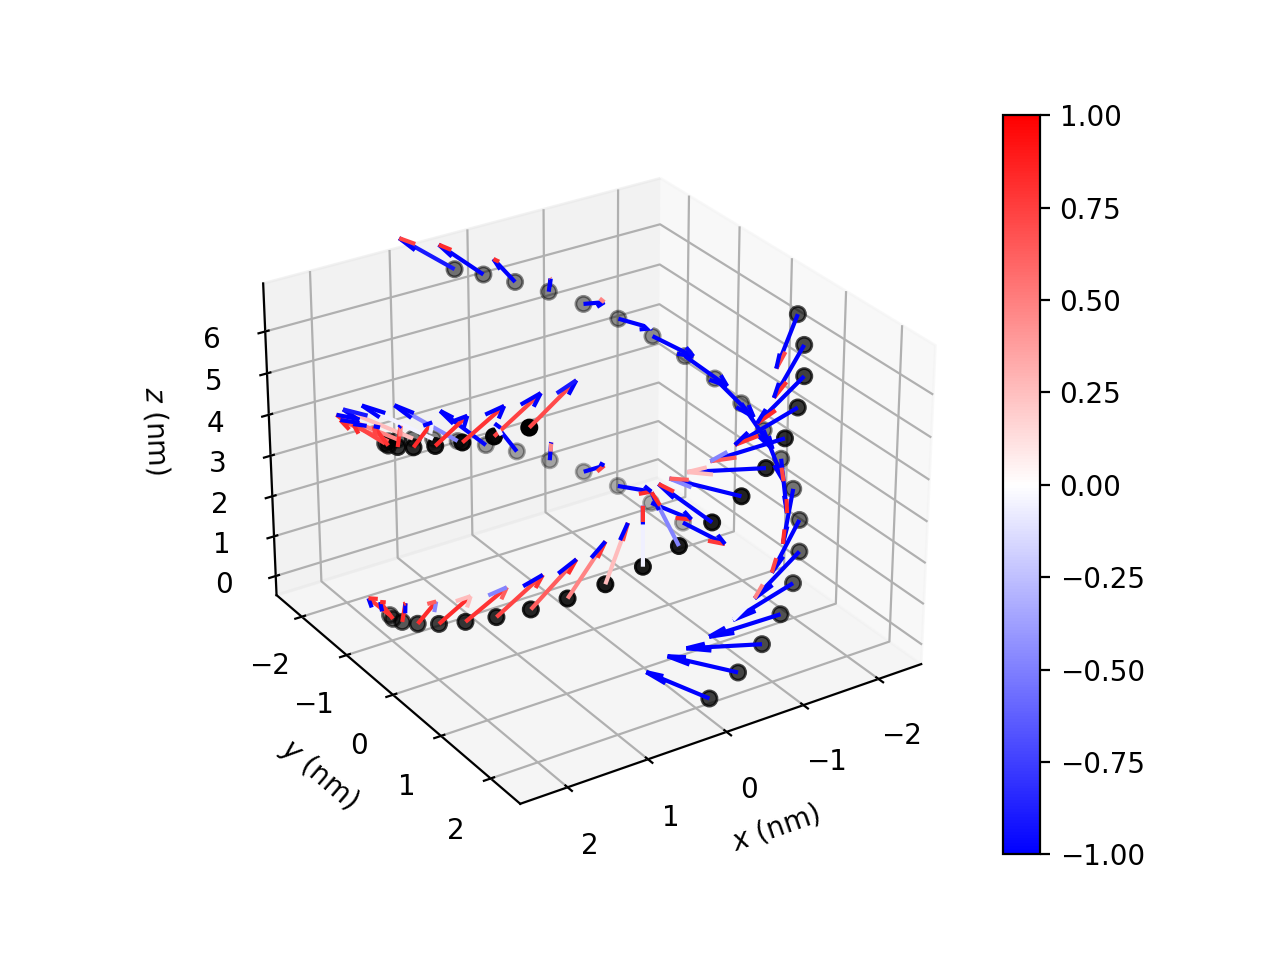

-79.76 J/mol/assem -3.99 J/mol/mono 20 monomers 7.00 nm


['requested number of basinhopping iterations completed successfully']

In [5]:
NN = 20
Bext = np.array([2,0,0]) # Applied Field
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':0.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = global_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_Mx_10_glob',SAV);
plot_res(p,Bdip,'quiver_Bx_loc_10_glob',SAV)

U_mono = U/kB/T/NN

N_min = np.ceil(-1.5/U_mono)
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
NN = 20
Bext = np.array([0,2,0]) # Applied Field
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = global_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_My_20_glob',SAV);
plot_res(p,Bdip,'quiver_By_loc_20_glob',SAV)

U_mono = U/kB/T/NN

N_min = np.ceil(-1.5/U_mono)
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
param['result'].message

Plot the distribution of the orientation and intensity of the dipolar fields.

<IPython.core.display.Javascript object>


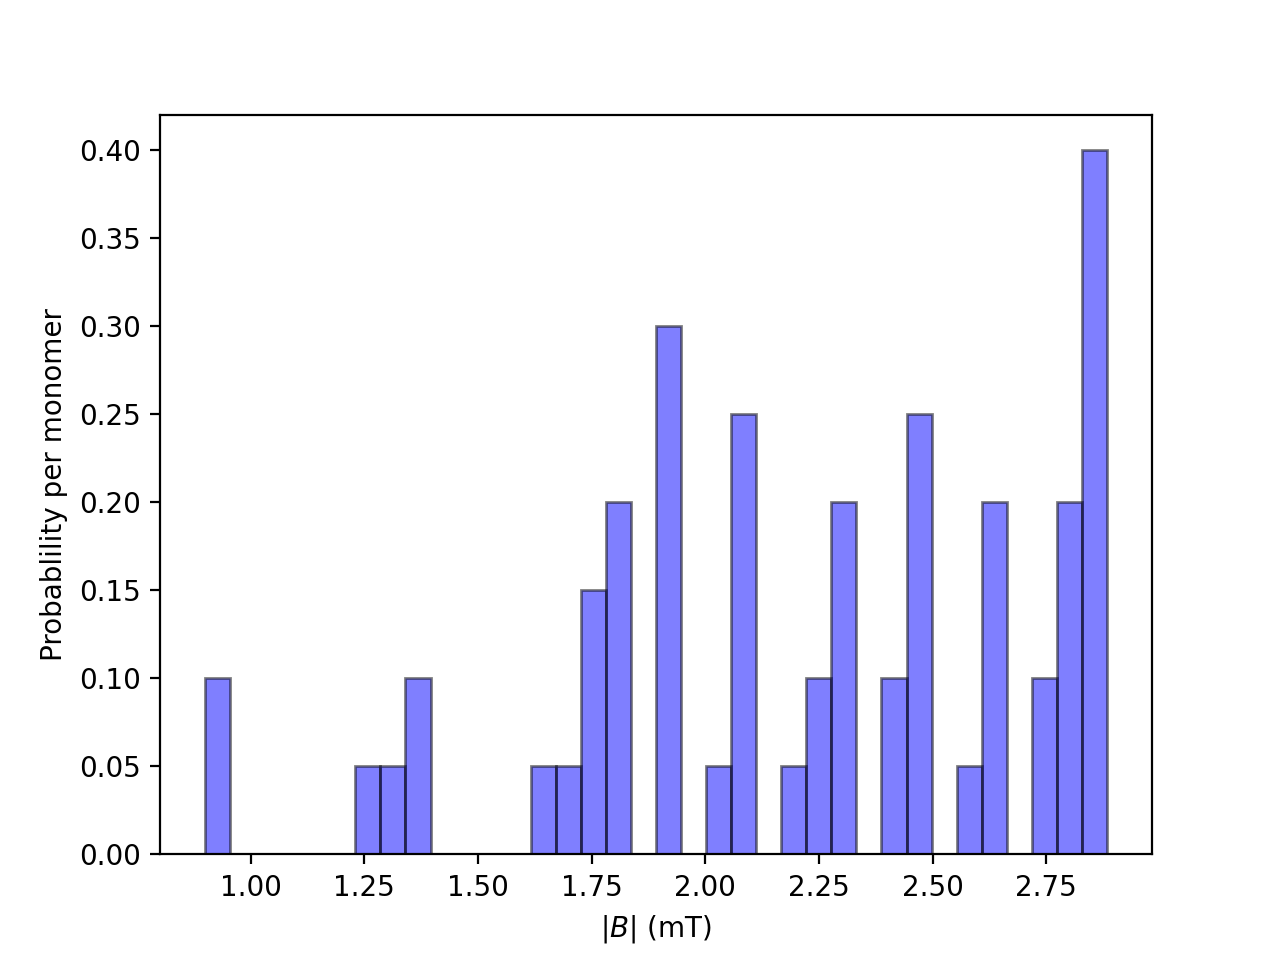

<IPython.core.display.Javascript object>


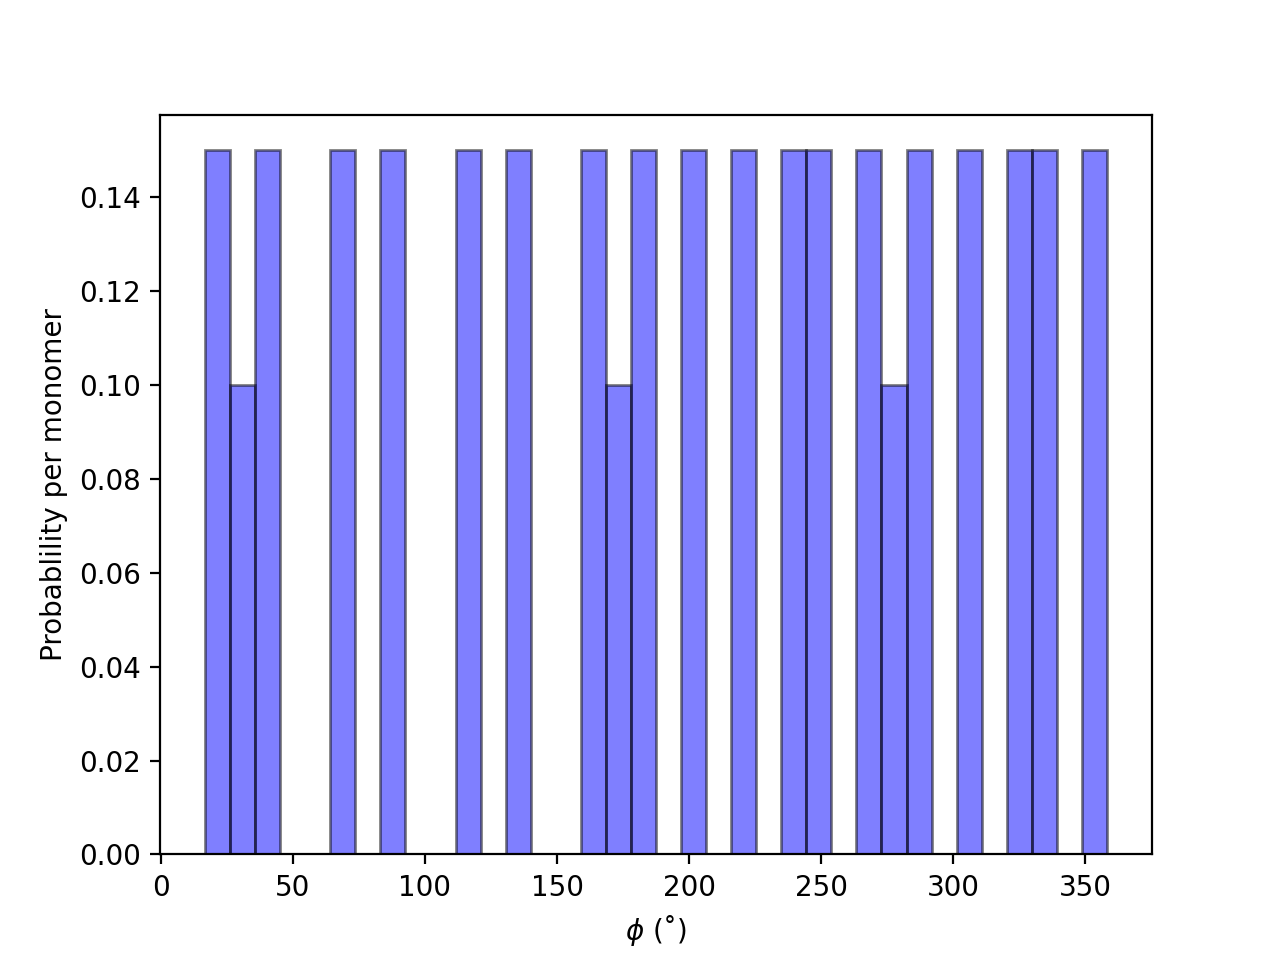

<IPython.core.display.Javascript object>


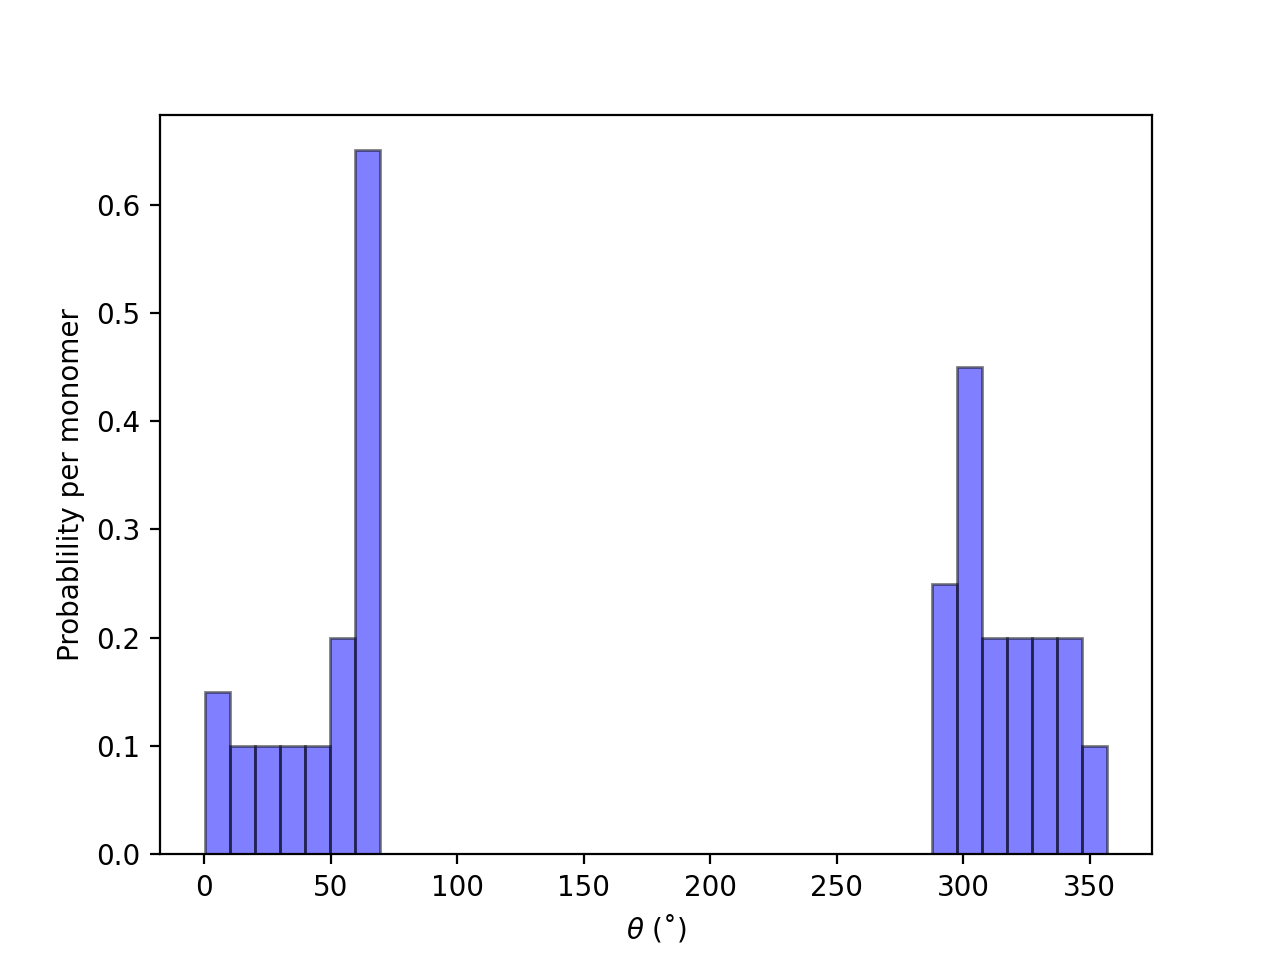

In [6]:
Bdip = (Bt - Bext)

B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


num_bins = 36
weights = np.ones_like(Bm)/NN

SAV = 0

plt.close('all')
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_x_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_x_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_x_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


## By

Calculate the groundstate for an assembly, and plot the magnetic moments and local dipolar fields at each atomic site.

<IPython.core.display.Javascript object>


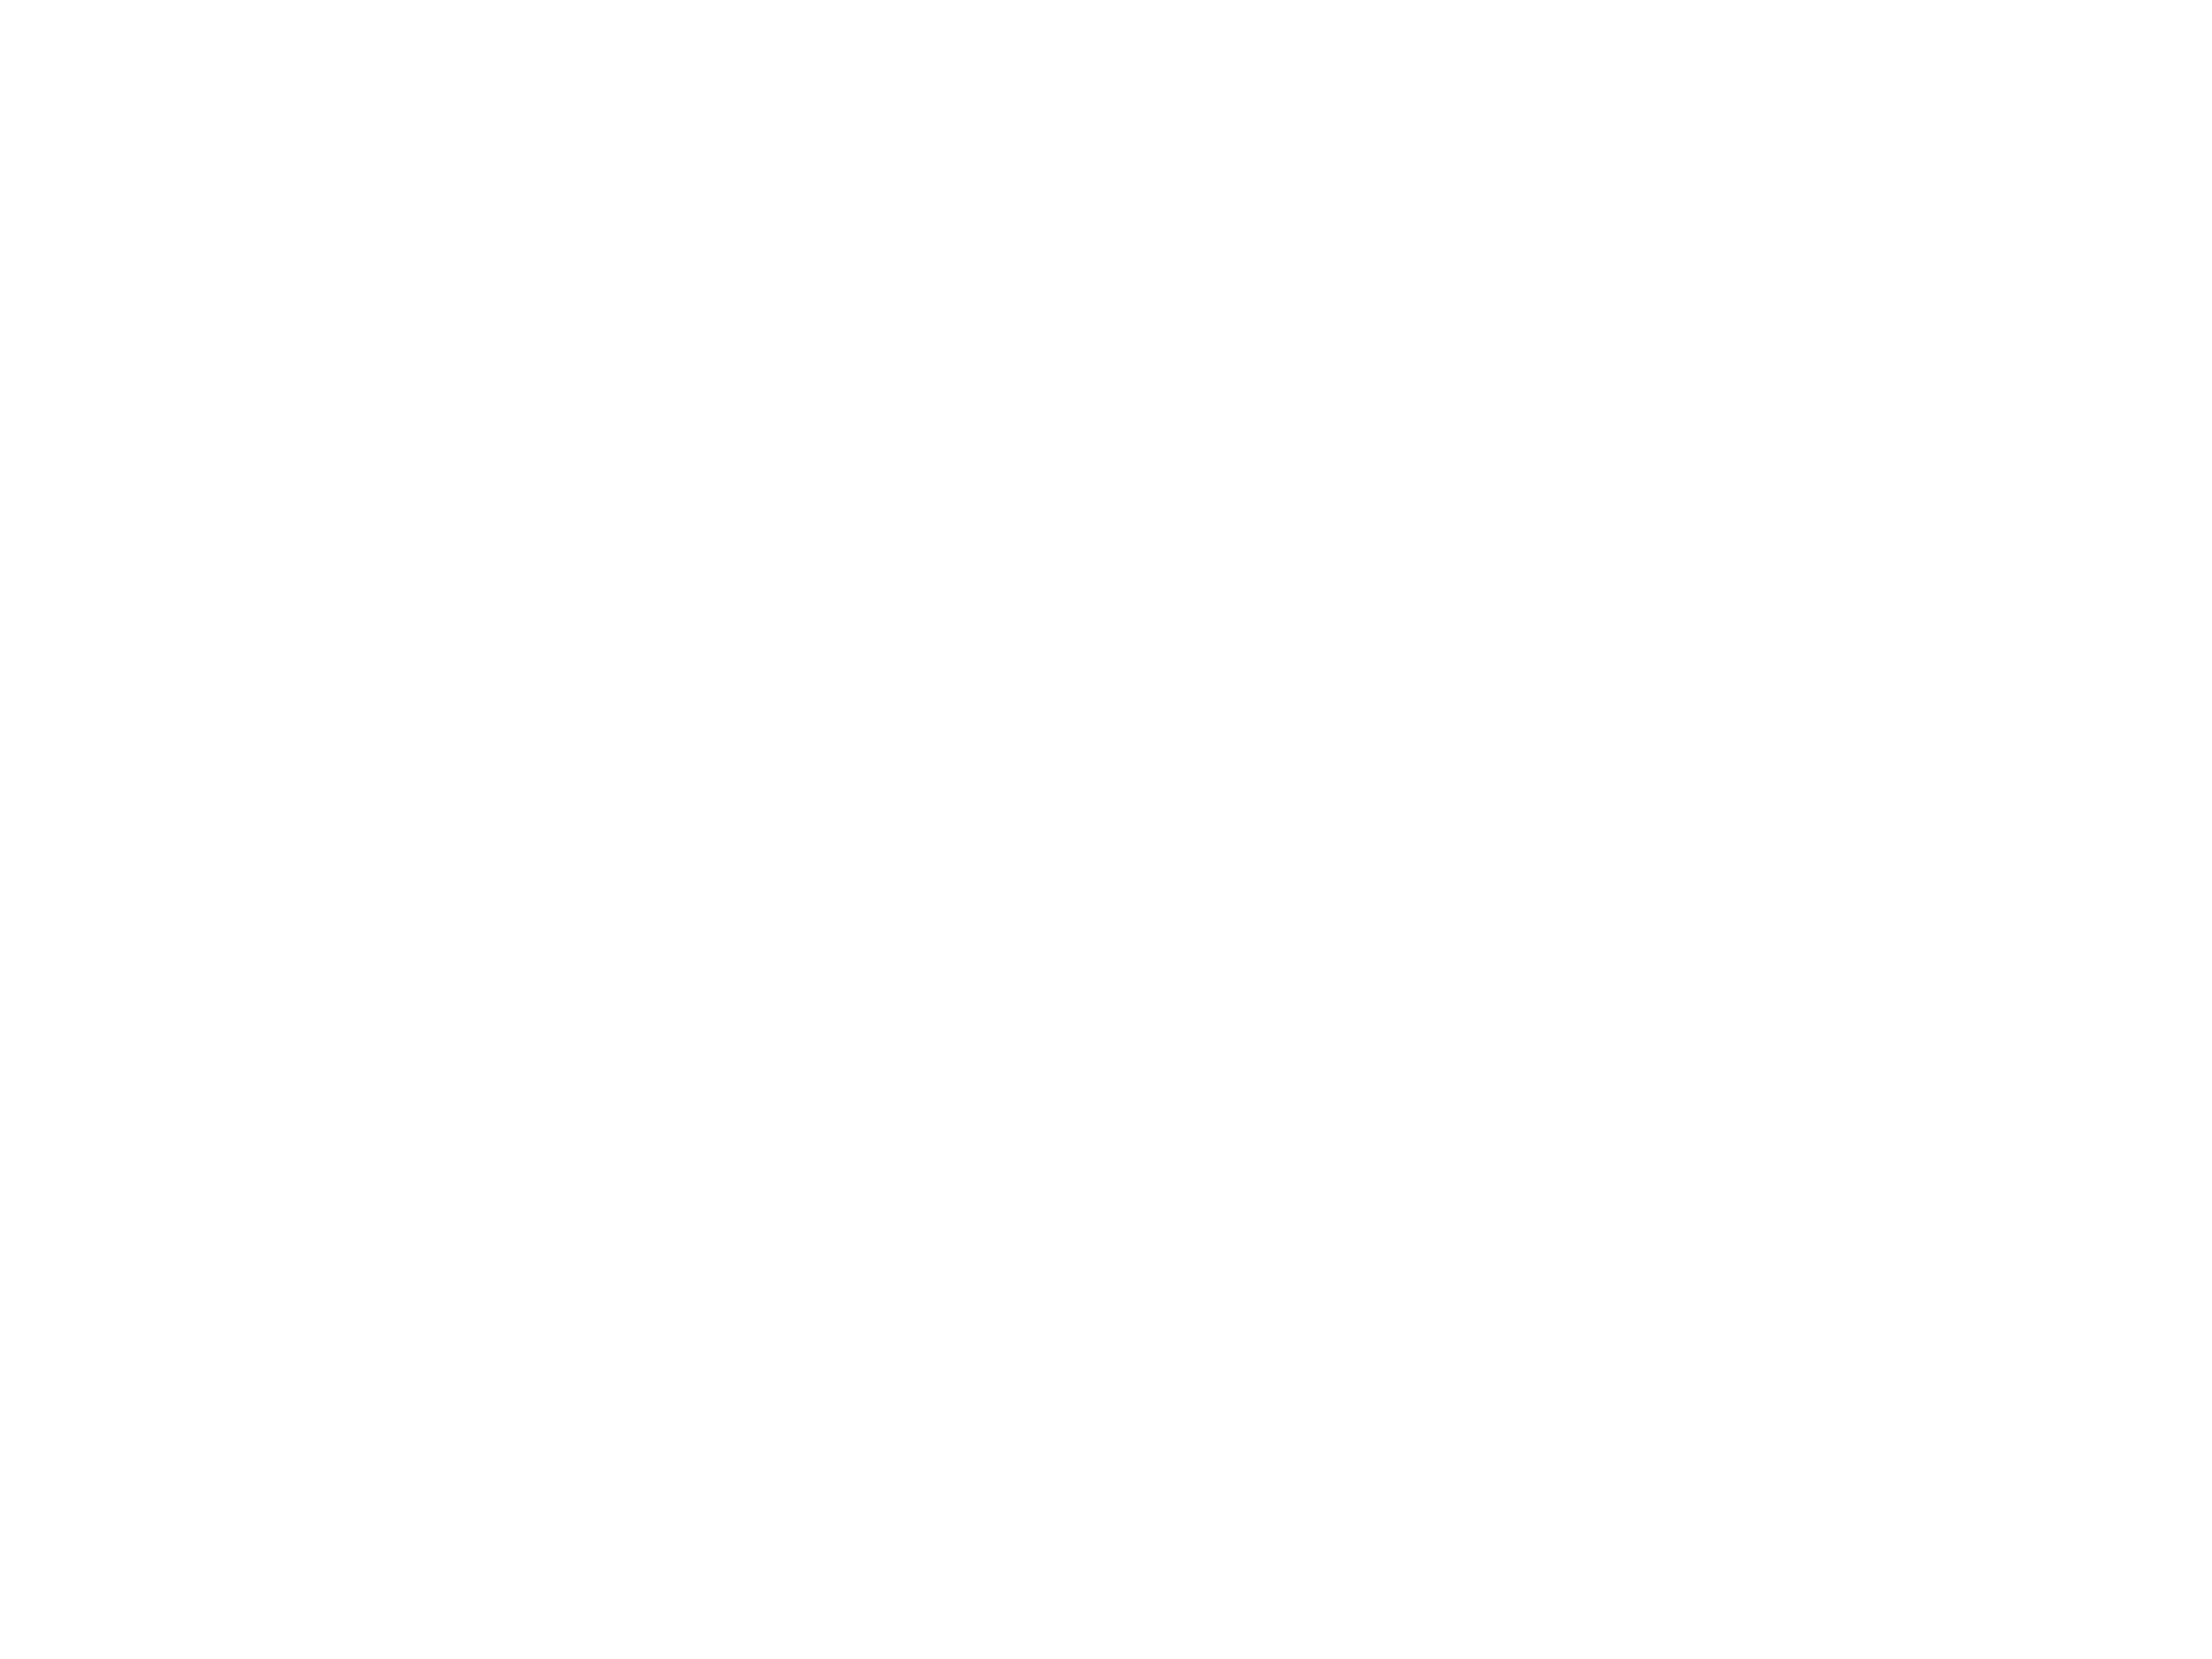

<IPython.core.display.Javascript object>


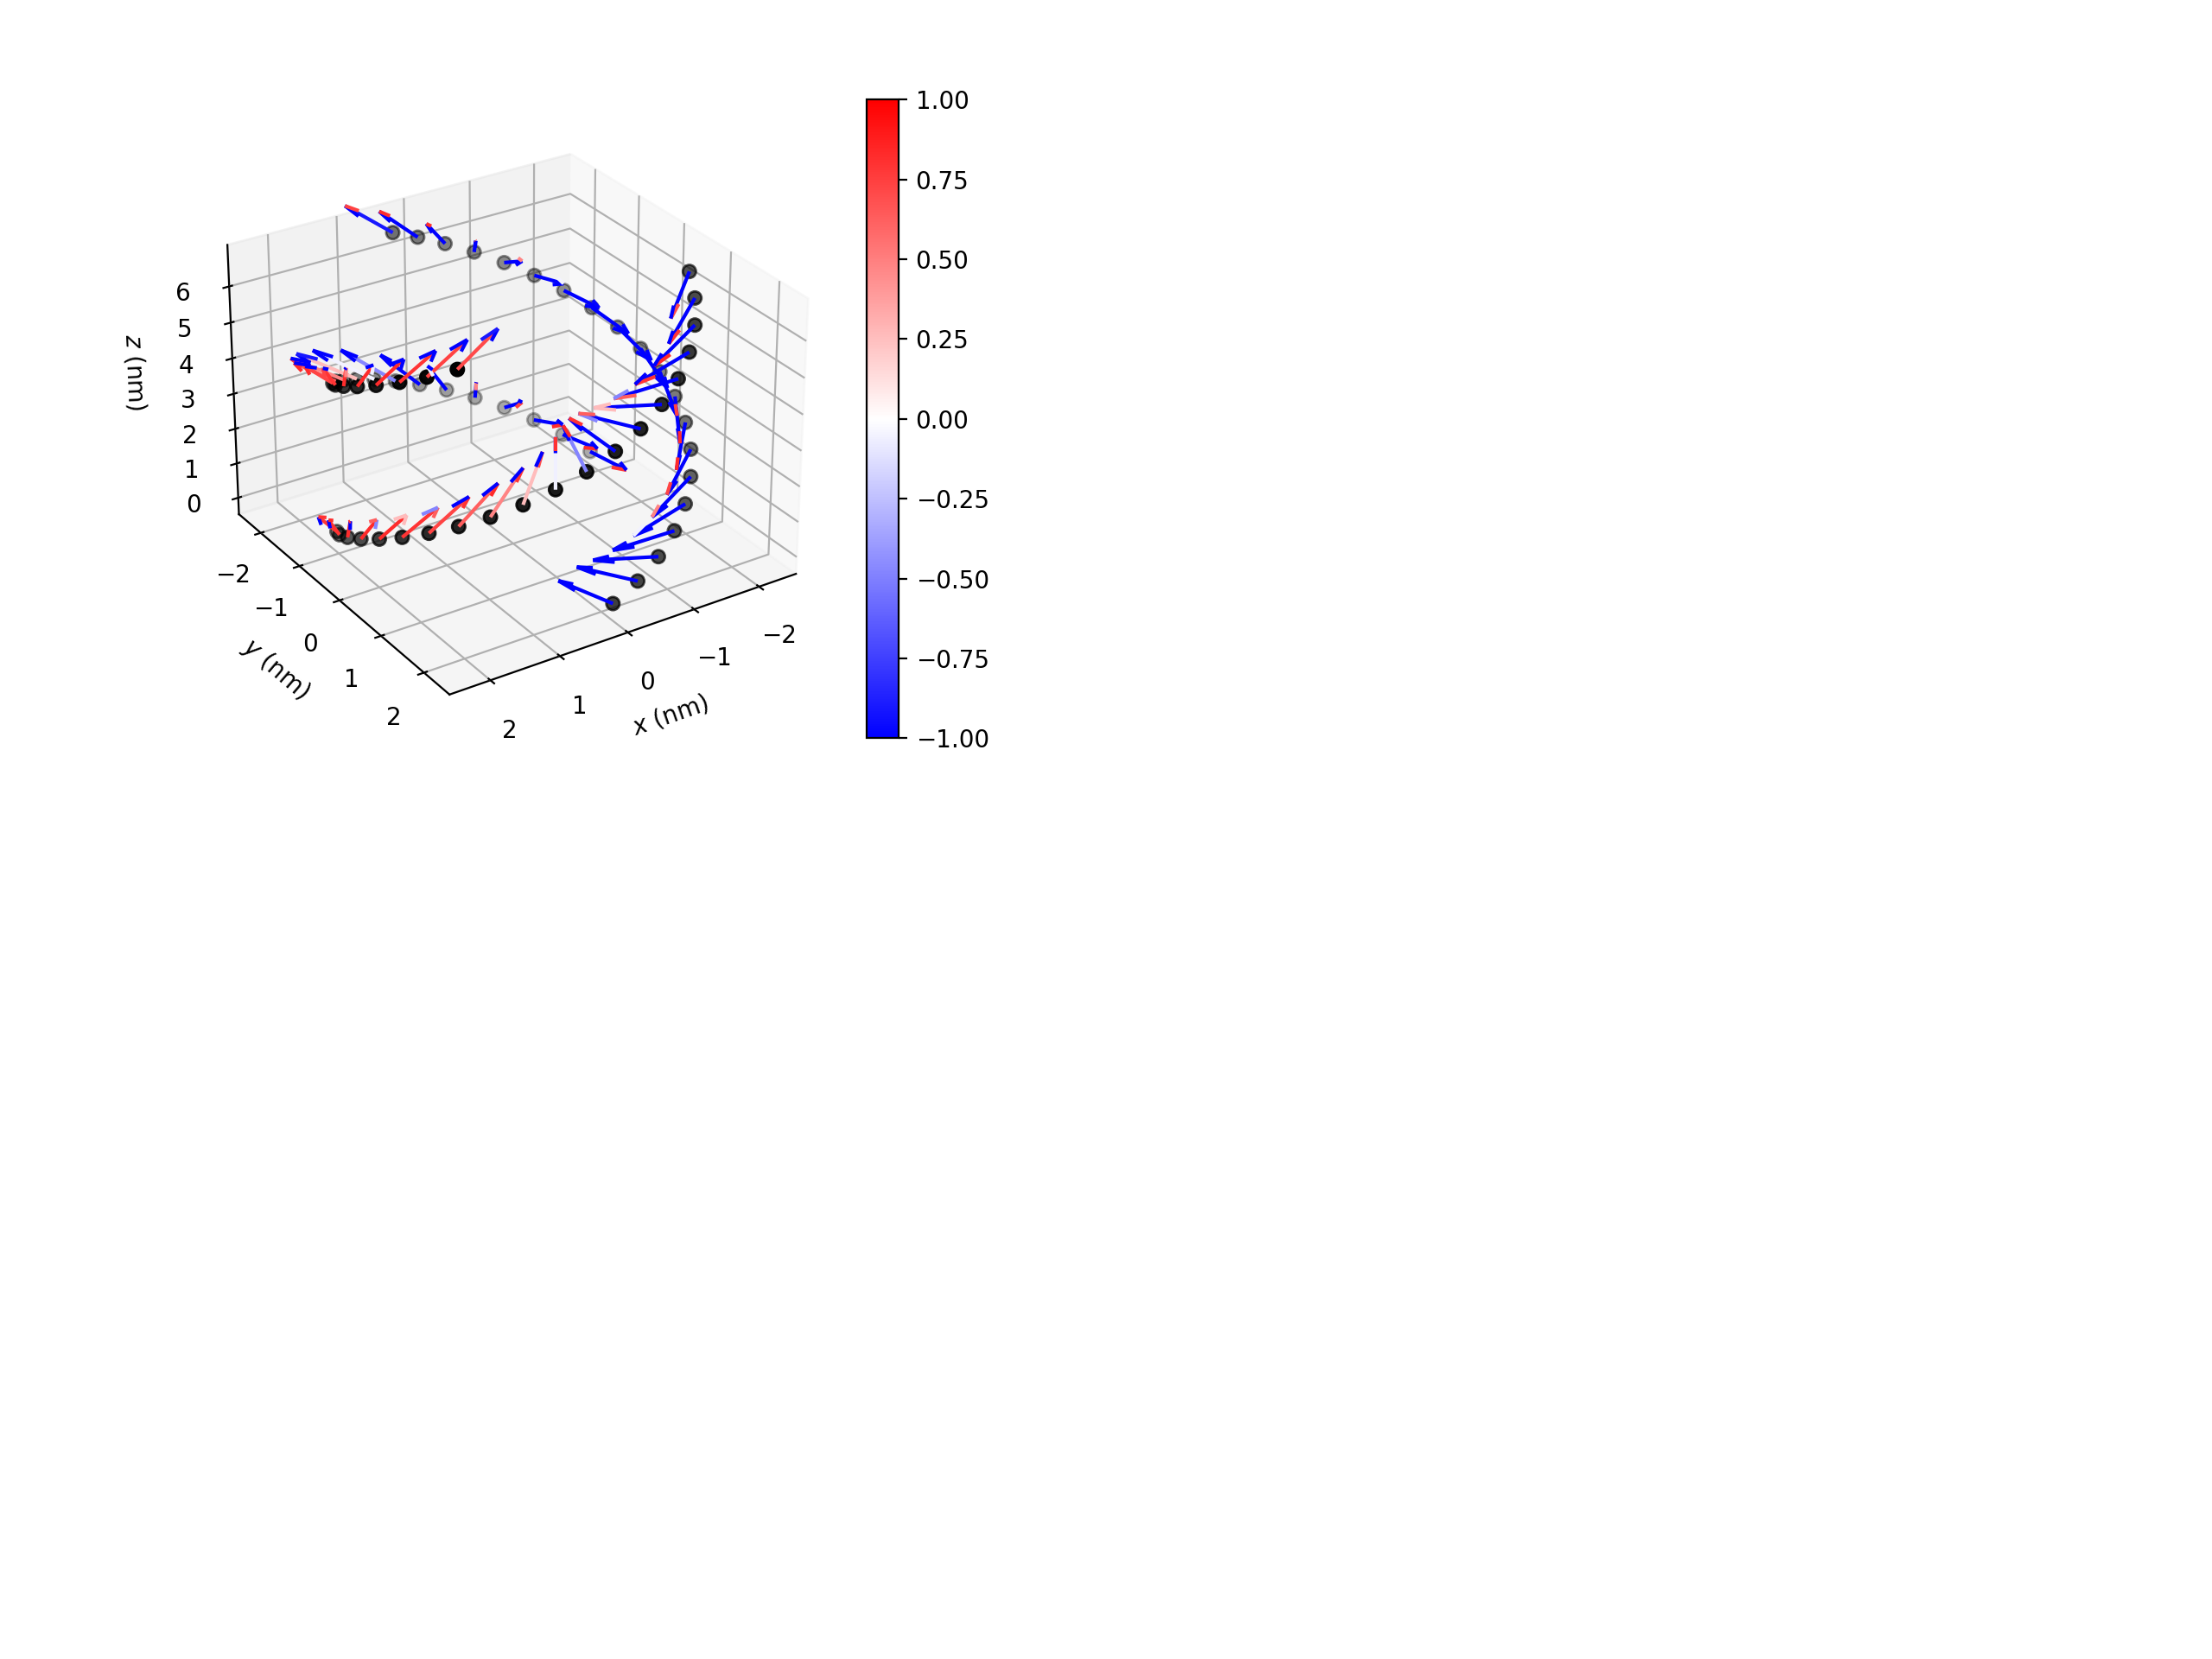

-79.76 J/mol/assem -3.99 J/mol/mono 20 monomers 7.00 nm


['requested number of basinhopping iterations completed successfully']

In [7]:
NN = 20
Bext = np.array([0,2,0]) # Applied Field
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':0.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = global_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_My_20_glob',SAV);
plot_res(p,Bdip,'quiver_By_loc_20_glob',SAV)

U_mono = U/kB/T/NN

N_min = np.ceil(-1.5/U_mono)
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
param['result'].message

Plot the distribution of the orientation and intensity of the dipolar fields.

<IPython.core.display.Javascript object>


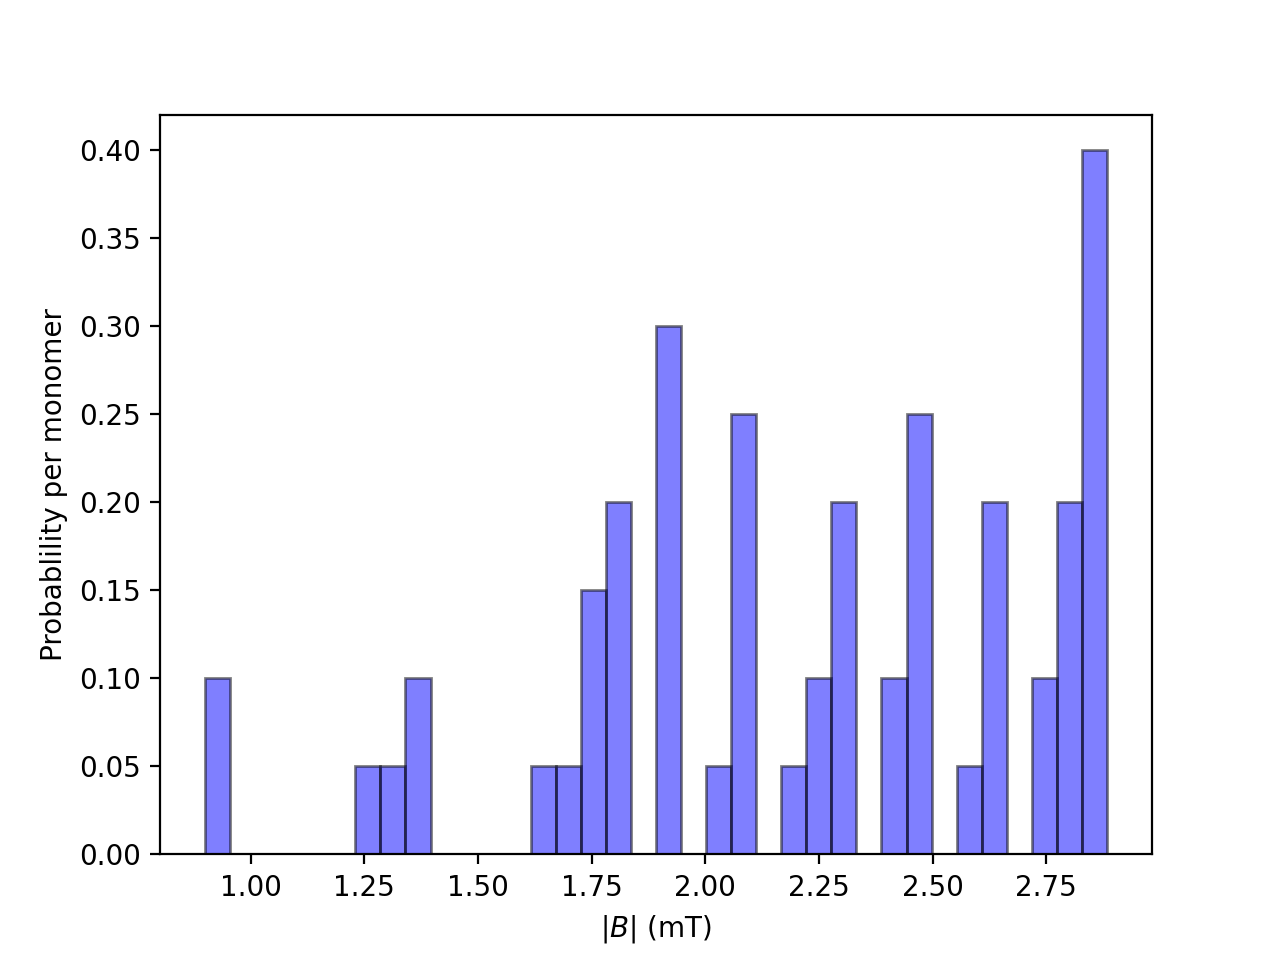

<IPython.core.display.Javascript object>


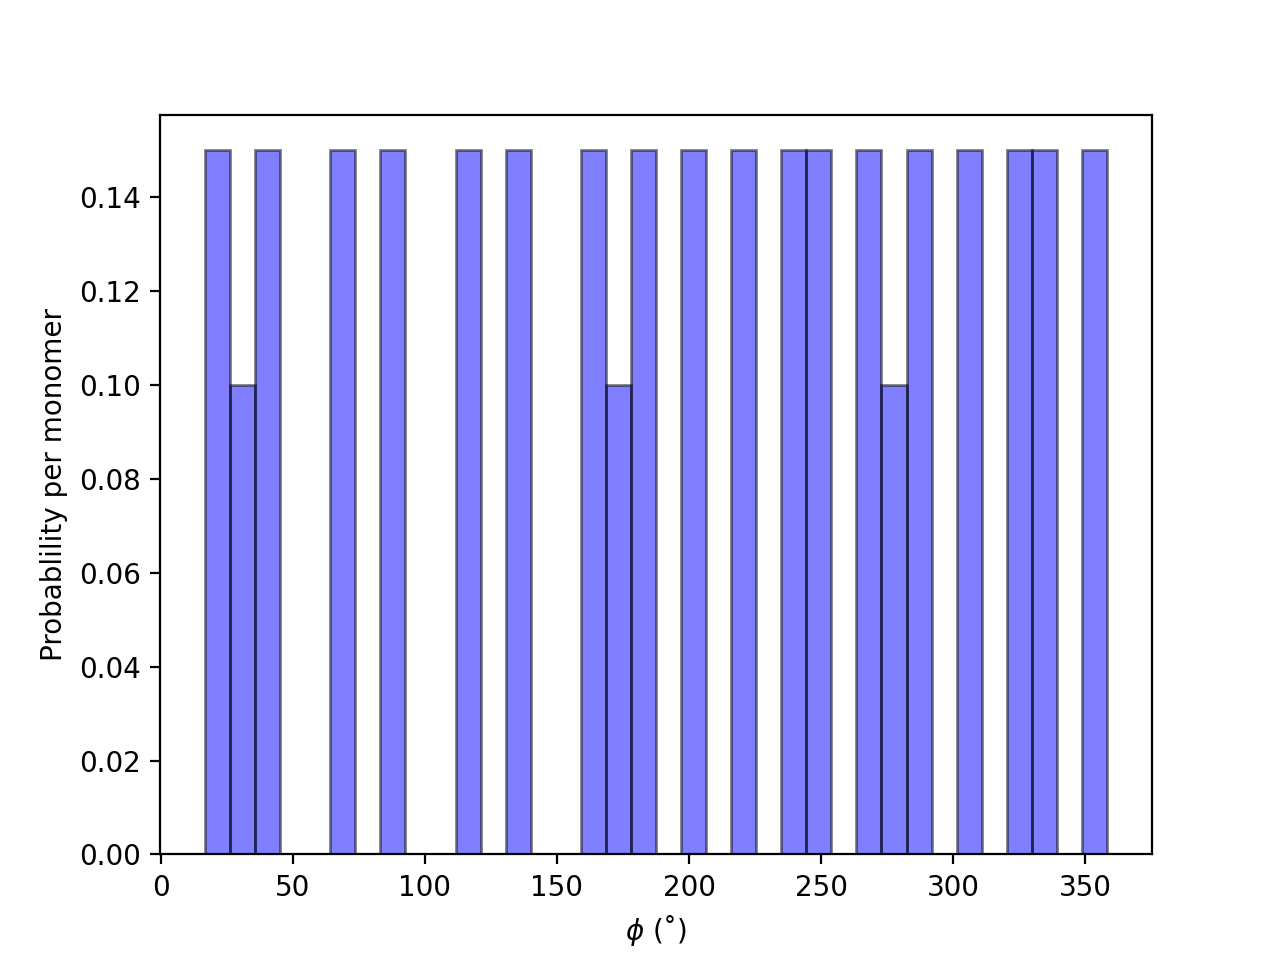

<IPython.core.display.Javascript object>


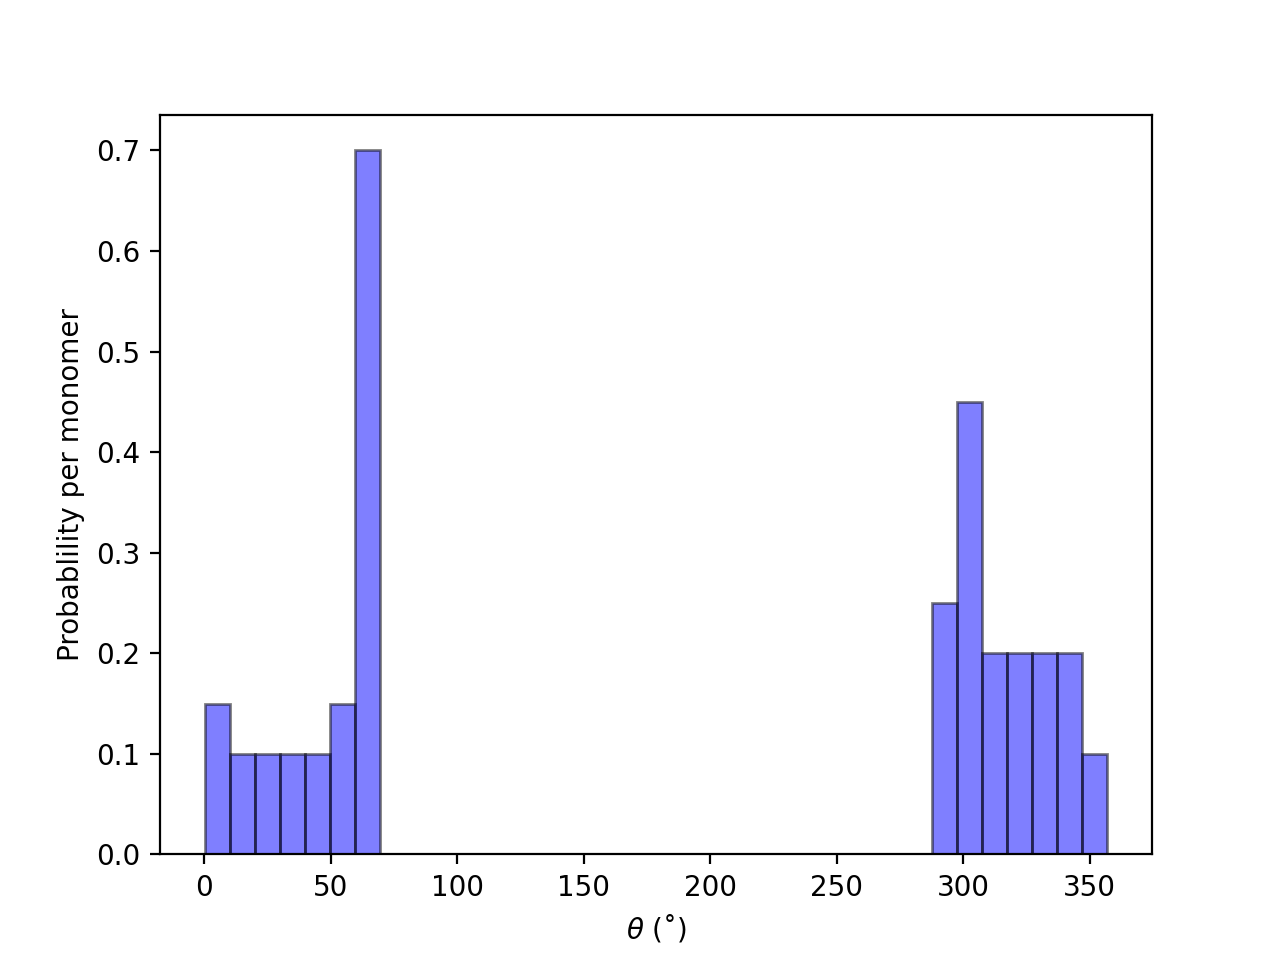

In [8]:
Bdip = (Bt - Bext)

B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


num_bins = 36
weights = np.ones_like(Bm)/NN

SAV = 0

plt.close('all')
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_y_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_y_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_y_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


## Bz

Calculate the groundstate for an assembly, and plot the magnetic moments and local dipolar fields at each atomic site.

<IPython.core.display.Javascript object>


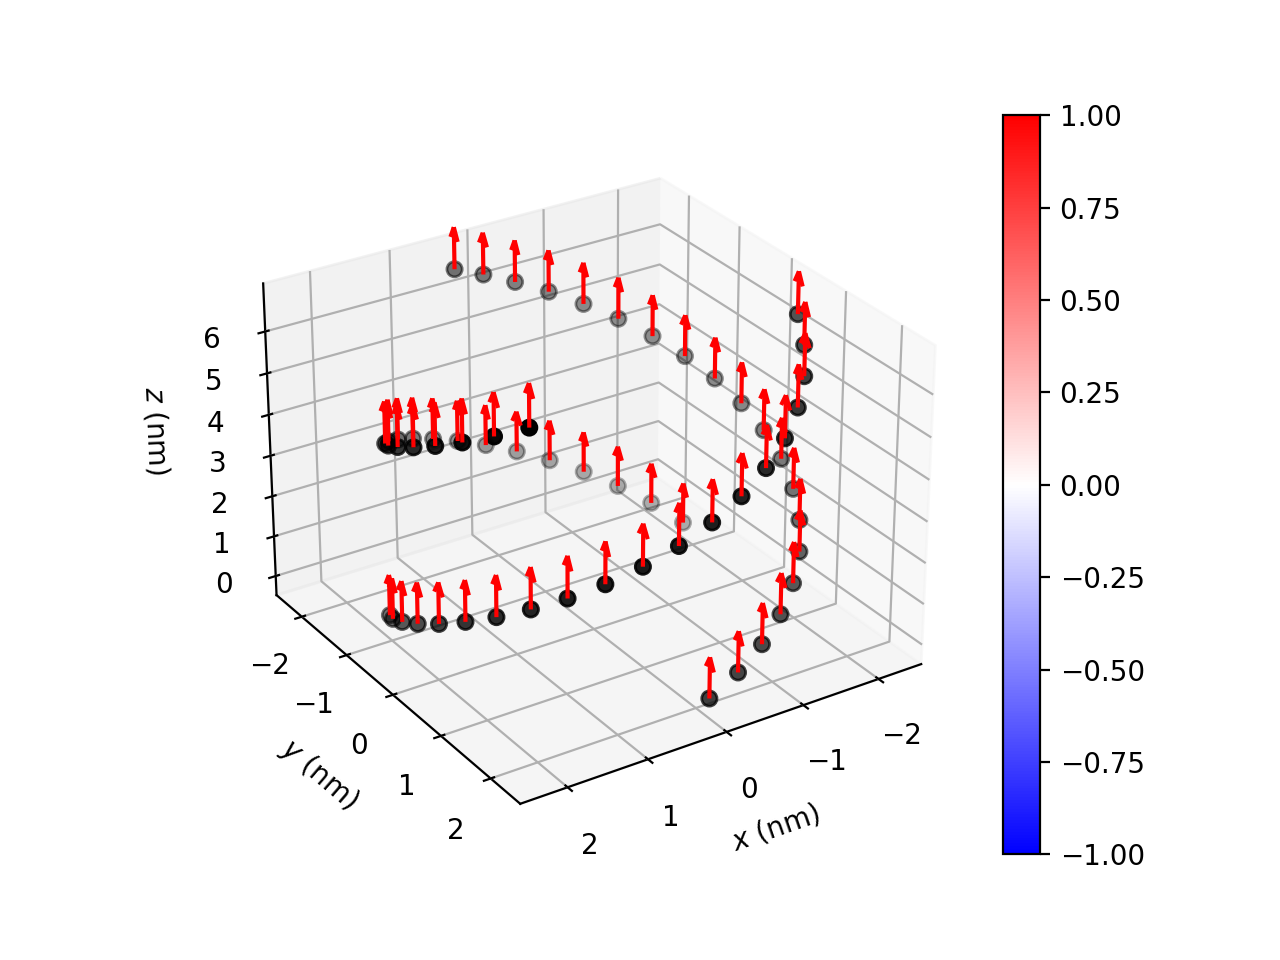

<IPython.core.display.Javascript object>


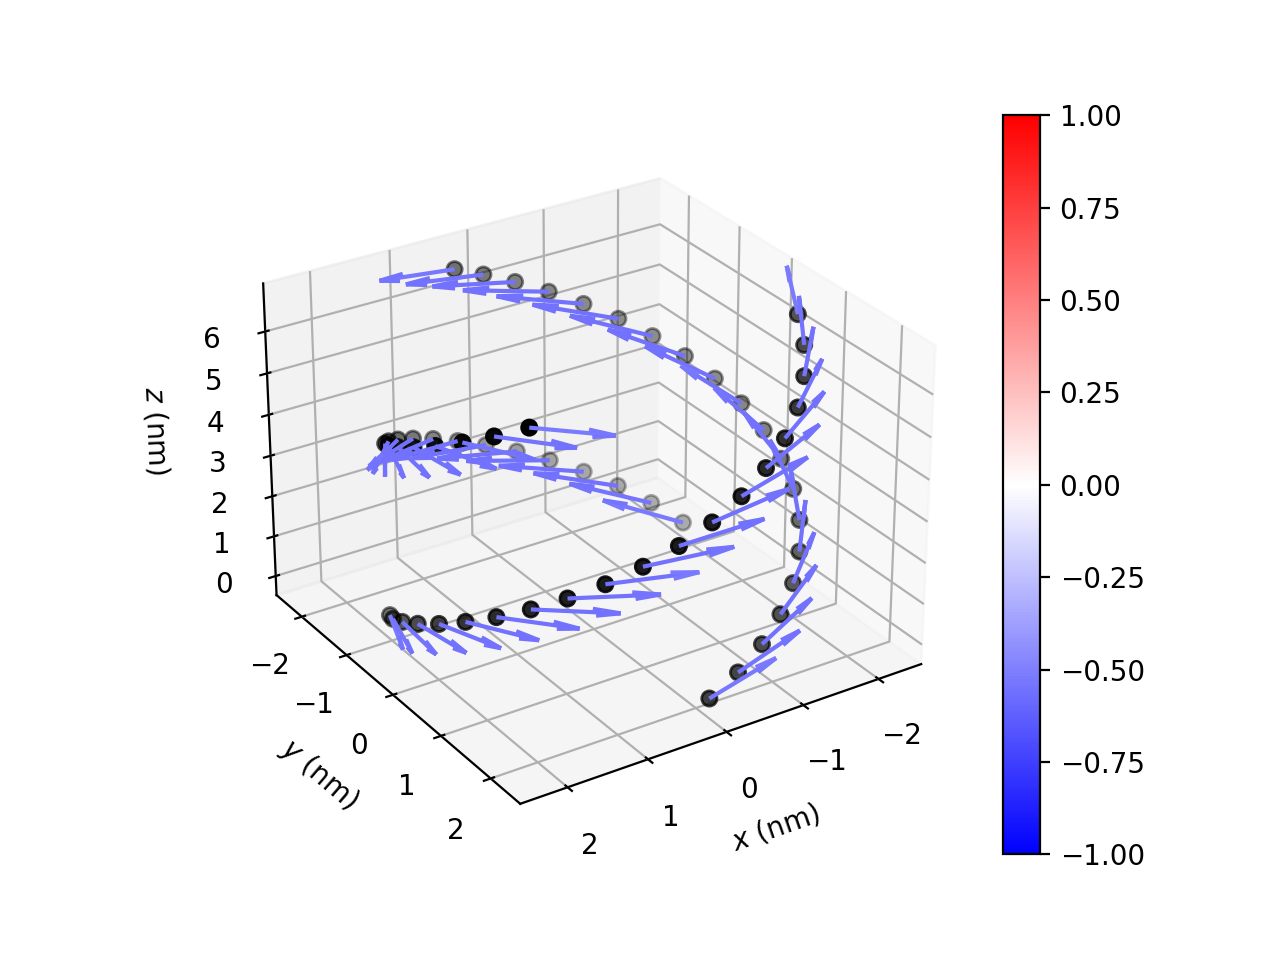

-79.80 J/mol/assem -3.99 J/mol/mono 20 monomers 7.00 nm


['requested number of basinhopping iterations completed successfully']

In [9]:
NN = 20
Bext = np.array([0,0,2]) # Applied Field
param = {
    'r':r,
    'd':d,
    'step':step,
    'm_atom':m_atom,
    'Bext':Bext,
    'T':T,
    'm_curie':curie_moment(m_atom,np.linalg.norm(Bext),T),
    'az':90.0,
    'el':90.0,
    'NN':NN,
    'min':1,
}
    
U,Bt,p = global_calc(param)

SAV = 0
plt.close('all')
Bdip = (Bt - Bext)
Bn = Bdip/Bdip.max()
m = init_magn(p,param['m_curie'],param['az'],param['el'])

plot_res(p,m/muB,'quiver_Mz_20_glob',SAV);
plot_res(p,Bdip,'quiver_Bz_loc_20_glob',SAV)

U_mono = U/kB/T/NN

N_min = np.ceil(-1.5/U_mono)
print('{0:0.2f} J/mol/assem {1:0.2f} J/mol/mono {2:0d} monomers {3:0.2f} nm'.format(
                                                            U*Na, U*Na/NN, NN, NN*d*1e9))
param['result'].message

Plot the distribution of the orientation and intensity of the dipolar fields.

<IPython.core.display.Javascript object>


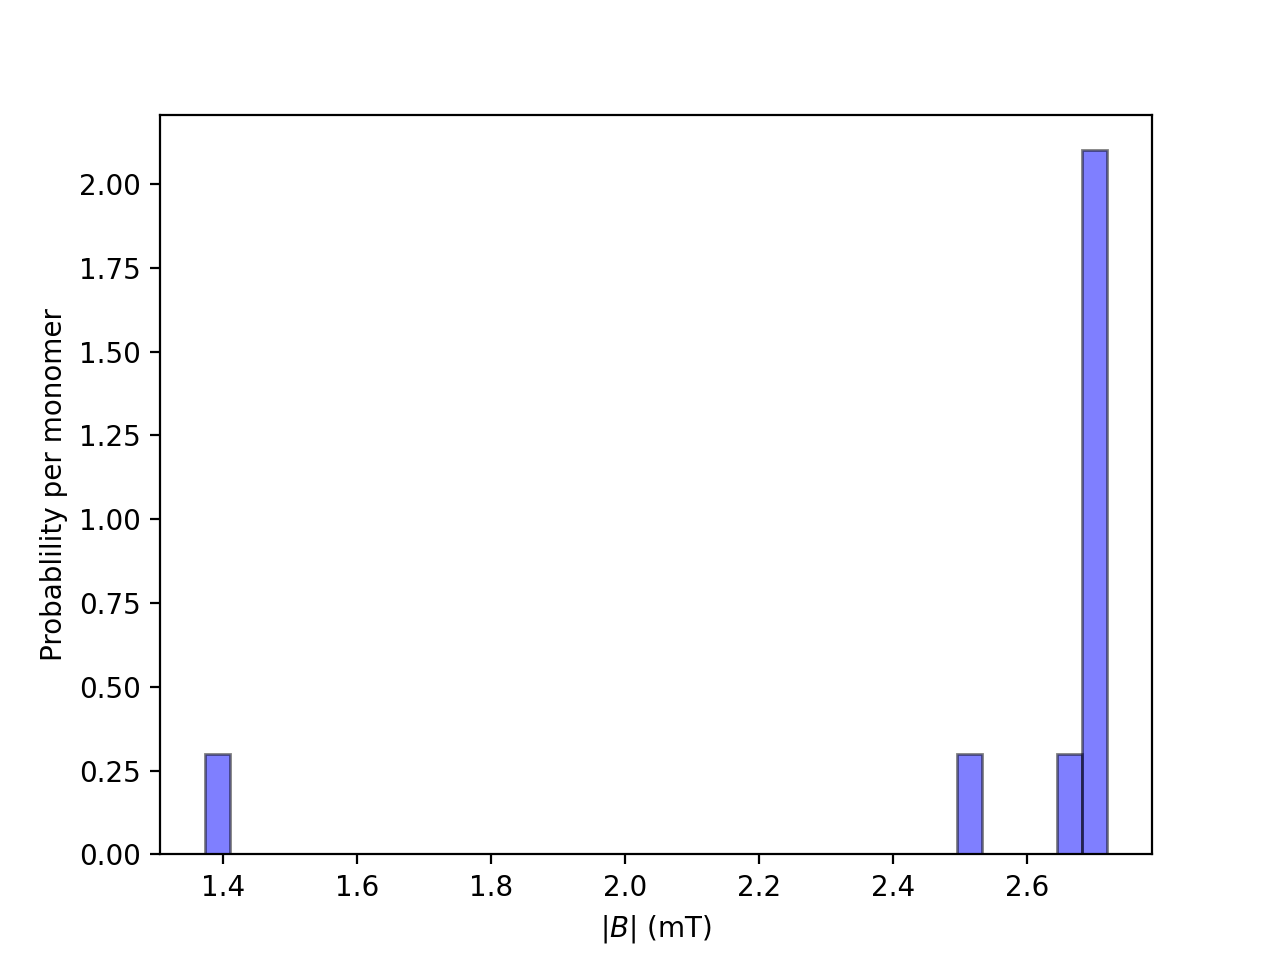

<IPython.core.display.Javascript object>


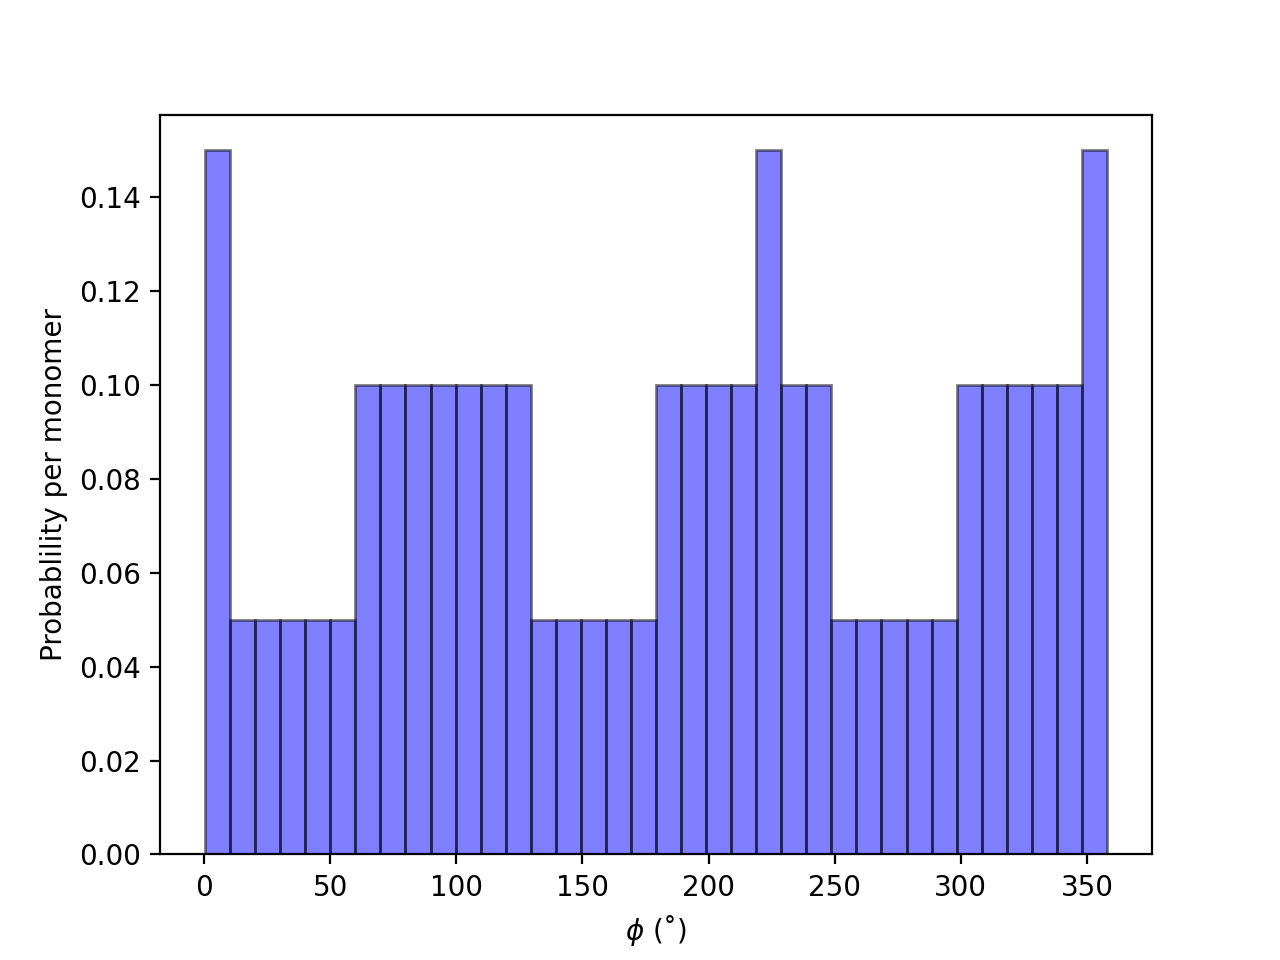

<IPython.core.display.Javascript object>


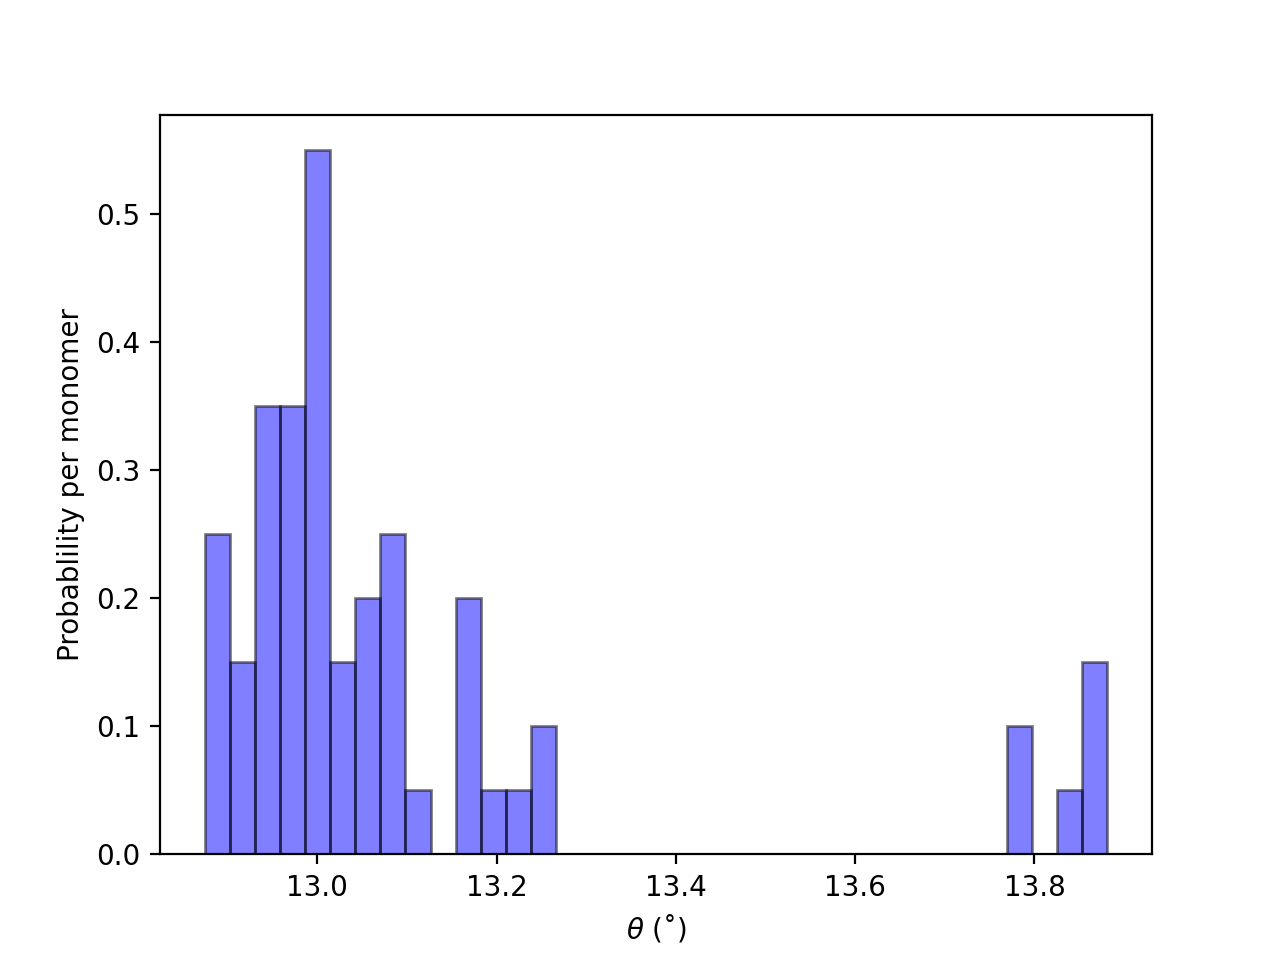

In [10]:
Bdip = (Bt - Bext)

B_az,B_el,Bm = cart2sph(Bdip[:,0], Bdip[:,1],Bdip[:,2])
B_az = np.rad2deg(B_az) % 360
B_el = np.rad2deg(B_el) % 360


num_bins = 36
weights = np.ones_like(Bm)/NN

SAV = 0

plt.close('all')
fig = plt.figure()
plt.hist(Bm*1e3,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$|B|$ (mT)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_Bm_z_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')

fig = plt.figure()
plt.hist(B_az,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\phi$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()
filenm = 'dist_azimuthal_z_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')


fig = plt.figure()
plt.hist(B_el,bins=num_bins, weights=weights, facecolor='blue', edgecolor='black', alpha=0.5)
plt.xlabel(r'$\theta$ (˚)')
plt.ylabel('Probablility per monomer')
plt.show()

filenm = 'dist_elevation_z_20_glob'
if SAV == 1:
    plt.savefig(filenm + '.pdf', dpi = 300, bbox_inches='tight')
    print('Saving to ' + filenm + '.pdf')
